# Problem 5.17

___This problem is only required for 507 and Honors students.  It will be counted as extra credit for all others.___

Use this notebook to present your work on the problem.  If you write scripts, store them in this folder and run them within this notebook to produce the requested histograms and graphs.

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy as sc 
from scipy.integrate import quad

## (a) Cauchy distribution

FWHM for the distribution below is: 2


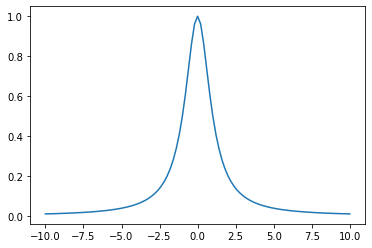

In [18]:
u_x = 0 
eta = 1
A = 1
x = np.linspace(-10,10,101)
p_cauchy = A/(1+((x-u_x)/eta)**2)
plt.plot(x,p_cauchy)

FWHM = 2*eta
print("FWHM for the distribution below is: {}".format(FWHM))

## (b) Gaussian distribution

The FWHM of the gaussian distribution is found by solving for the values of x where $f(x) = 1/2 * f(x)_{max}$. We know that at f(x_max) is at $x_{max} = u$ we can then solve the equation of the guassian distribution and see that FWHM = $2*sqrt(2*ln(2))*sigma$ where $sigma$ is the standard deviation of the distribution. This roughly translates to FWHM = 2.3548 * $\sigma$. 

If we want this FWHM to match the FWHM from the cauchy distribution we need to find the value of $\sigma$ that yields FWHM = 2

In [19]:
FWHM = 2
sigma = 2/2.3548
print('The Standard Deviation that gives a FWHM of 2 is {}'.format(sigma))

The Standard Deviation that gives a FWHM of 2 is 0.8493290300662477


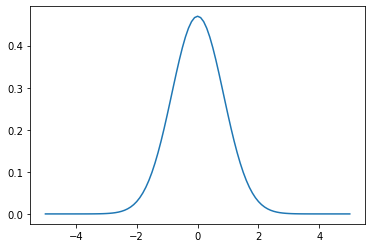

In [45]:
# Plotting a gaussian with FWHM = 2 and expectation of 0
x1 = np.linspace(-5,5,101)
mu = 0 
gaussian = (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(x1 - mu)**2 / (2*sigma**2))
plt.plot(x,gaussian)

## (c) $P(|x| > FWHM/2)$ for Cauchy distribution

In [46]:
FWMH = 2
p_absx = np.array(np.abs(x) > FWHM/2) 
p_absx[0:40]
p_absx[61:-1]
P_x = (p_cauchy[0:40].sum() + p_cauchy[61:-1].sum())/(len(p_cauchy[0:40])+len(p_cauchy[61:-1]))
P_x

0.04360825870472735

## (d) $P(|x| > FWHM/2)$ for Gaussian distribution

In [62]:
p_absx_g = np.array(np.abs(x1) > FWHM/2)
p_absx_g[0:40]

lower_lim_l = x1[0]
upper_lim_l = x1[40]

lower_lim_r = x1[61]
upper_lim_r = x1[-1]

In [64]:
def integrand(x):
    return (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(x - 0)**2 / (2*sigma**2))
ans_left,error_left = quad(integrand,lower_lim_l,upper_lim_l)
ans_right,error_right = quad(integrand,lower_lim_r,upper_lim_r)
P_absx_g = ans_left+ans_right
print(P_absx_g)

0.21720897500881098


## (e) $P(|x| > 1.5 \, FWHM)$ for Cauchy and Gaussian distributions

In [72]:
FWMH = 2
p_absx = np.array(np.abs(x) > FWHM*1.5) 
p_absx[0:20]
p_absx[81:-1]
P_x = (p_cauchy[0:20].sum() + p_cauchy[81:-1].sum())/(len(p_cauchy[0:20])+len(p_cauchy[81:-1]))
P_x

0.016102564065846935

In [73]:
p_absx_g = np.array(np.abs(x1) > FWHM*1.5)

lower_lim_l = x1[0]
upper_lim_l = x1[20]

lower_lim_r = x1[81]
upper_lim_r = x1[-1]

In [74]:
def integrand(x):
    return (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(x - 0)**2 / (2*sigma**2))
ans_left,error_left = quad(integrand,lower_lim_l,upper_lim_l)
ans_right,error_right = quad(integrand,lower_lim_r,upper_lim_r)
P_absx_g = ans_left+ans_right
print(P_absx_g)

0.0003372911292300328


## (f) Interquartile range

In [75]:
#Cauchy Distribution
u_x = 0 
eta = 1
A = 1
x = np.linspace(-10,10,101)
p_cauchy = A/(1+((x-u_x)/eta)**2)
q3,q1 = np.percentile(p_cauchy,[75,25])
IQR = q3-q1
print(IQR)

0.11184759953120509


The Standard Deviation that gives a FWHM of 2 is 0.04749770661253826


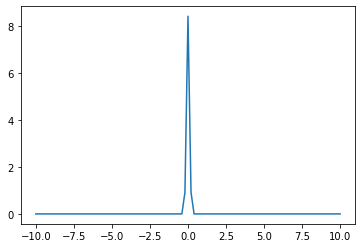

In [76]:
#Finding Gaussian with same IQR
sigma = IQR/2.3548
print('The Standard Deviation that gives a FWHM of 2 is {}'.format(sigma))

x1 = np.linspace(-5,5,101)
mu = 0 
gaussian = (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(x1 - mu)**2 / (2*sigma**2))
plt.plot(x,gaussian)

In [83]:
#Cauchy with P(abs(x)>IQR/2)
p_absx = np.array(np.abs(x) > IQR/2) 
p_absx
p_absx[0:50]
p_absx[51:-1]
P_x = (p_cauchy[0:50].sum() + p_cauchy[51:-1].sum())/(len(p_cauchy[0:50])+len(p_cauchy[51:-1]))
P_x

0.13849708479839076

In [84]:
#Gaussian with P(abs(x)>IQR/2)
p_absx_g = np.array(np.abs(x1) > IQR/2)

lower_lim_l = x1[0]
upper_lim_l = x1[50]

lower_lim_r = x1[51]
upper_lim_r = x1[-1]

In [88]:
def integrand(x):
    return (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(x - 0)**2 / (2*sigma**2))
ans_left,error_left = quad(integrand,lower_lim_l,upper_lim_l)
ans_right,error_right = quad(integrand,lower_lim_r,upper_lim_r)
P_absx_g = ans_left+ans_right
print(P_absx_g)

0.0


In [95]:
#Repeat Cauchy with IQR*1.5
p_absx = np.array(np.abs(x) > IQR*1.5) 
p_absx
p_absx[0:50]
p_absx[51:-1]
P_x = (p_cauchy[0:50].sum() + p_cauchy[51:-1].sum())/(len(p_cauchy[0:50])+len(p_cauchy[51:-1]))
P_x

0.13849708479839076

In [97]:
p_absx_g = np.array(np.abs(x1) > IQR/2)

lower_lim_l = x1[0]
upper_lim_l = x1[50]

lower_lim_r = x1[51]
upper_lim_r = x1[-1]

0.16777139929680762

In [98]:
def integrand(x):
    return (1/(sigma*np.sqrt(2*3.14)))*np.exp(-(x - 0)**2 / (2*sigma**2))
ans_left,error_left = quad(integrand,lower_lim_l,upper_lim_l)
ans_right,error_right = quad(integrand,lower_lim_r,upper_lim_r)
P_absx_g = ans_left+ans_right
print(P_absx_g)

0.0
